In [21]:
%matplotlib inline
import random
import torch
from torch.distributions.multinomial import Multinomial
from required import torch as d2l


In [22]:
# Testing Coin Toss
num_tosses = 100_000_000
heads = sum([random.random() > 0.5 for _ in range(num_tosses)])
tails = num_tosses - heads
print(f'Heads: {heads/num_tosses:.2f}, Tails: {tails/num_tosses:.2f}')


Heads: 0.50, Tails: 0.50


In [23]:
# Using PyTorch
probs = torch.tensor([0.5, 0.5])
Multinomial(100, probs).sample()/100

tensor([0.4200, 0.5800])

In [24]:
# Higher number of tosses, use GPU for faster computation
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# device = torch.device('cpu') # Uncomment to run on CPU
print(f'Using device: {device}')

num_tosses = 100_000_000
probs = torch.tensor([0.5, 0.5], device=device)
count = Multinomial(num_tosses, probs).sample()
count/num_tosses

Using device: cuda


tensor([0.5000, 0.5000], device='cuda:0')

In [25]:
fair_probs = torch.tensor([0.5, 0.5])

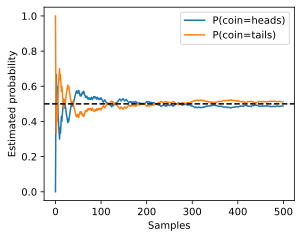

In [32]:
counts = Multinomial(1, fair_probs).sample((500,))
cum_counts = counts.cumsum(dim=0)
estimates = cum_counts / cum_counts.sum(dim=1, keepdims=True)

d2l.set_figsize((4.5, 3.5))
d2l.plt.plot(estimates[:, 0], label=("P(coin=heads)"))
d2l.plt.plot(estimates[:, 1], label=("P(coin=tails)"))
d2l.plt.axhline(y=0.5, color='black', linestyle='dashed')
d2l.plt.gca().set_xlabel('Samples')
d2l.plt.gca().set_ylabel('Estimated probability')
d2l.plt.legend();
